In [1]:

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler 

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.feature_selection import RFE

from sklearn.metrics import classification_report,f1_score,recall_score,precision_score,accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from imblearn.over_sampling import SMOTE

In [2]:
def plot_vimp(poss, X, Y, feature_names):
    
    from    sklearn.tree            import  DecisionTreeClassifier
    from    sklearn.ensemble        import  RandomForestClassifier        
    from    sklearn.ensemble        import  AdaBoostClassifier
    from    xgboost                 import  XGBClassifier  
    
    tex     =  " (Normalized) total reduction of the criterion brought by that feature."
        
    if poss == 0:
        name   =   "Decision Tree"
        clf    =   DecisionTreeClassifier(criterion="entropy", max_depth = 4, min_impurity_decrease = 0)
        clf.fit(X, Y)
    elif poss == 1:
        name   =   "Random Forest"        
        clf    =   RandomForestClassifier()
        clf.fit(X, Y)  
    elif poss == 2:
        name   =   "GradientBoost"             
        clf    =   GradientBoostingClassifier()
        clf.fit(X, Y)          
    elif poss == 3:
        name   =   "AdaBoost"        
        clf    =   AdaBoostClassifier()
        clf.fit(X, Y)
    elif poss==4:
        name  =     "XGBoost"
        clf   =      XGBClassifier()
        clf.fit(X, Y)
        
    ###
    ### Variable importance Plot
    ###
    importances =  clf.feature_importances_
    indices     =  np.argsort(importances)
    titlex      =  'Feature Importances for '+ name
    plt.title(titlex)
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
    plt.xlabel('Relative Importance :\n' + tex)
    plt.show

In [3]:
def draw_roc( actual, probs ):

    import pandas            as   pd
    import numpy             as   np
    import seaborn           as   sns
    import matplotlib.pyplot as   plt
    import sklearn.metrics   as   metrics
    import seaborn           as   sns
    
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
    drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic curve')
    plt.legend(loc="lower right")
    plt.show()

In [4]:
feature_names         =  ['Gender', 'Customer Type', 'Type of Travel', 'Class','Inflight wifi service',\
                          'Departure/Arrival time convenient','Ease of Online booking', 'Online boarding',\
                          'Seat comfort', 'On-board service', 'Leg room service', 'Baggage handling',\
                          'Checkin service', 'Cleanliness', 'Inflight service']

In [5]:
trn=pd.read_csv(r"C:\Users\Vineha\Downloads\sneha_project\db\train_16_cols.csv")
trn

,Gender,Customer Type,Type of Travel,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Online boarding,Seat comfort,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Inflight service,satisfaction
0,1.0,0.0,1.0,1.0,3.0,5.0,3.0,3.0,3.0,4.0,2.0,3.0,3.0,3.0,5.0,0.0
1,1.0,1.0,0.0,1.0,3.0,2.0,2.0,2.0,3.0,2.0,1.0,0.0,2.0,3.0,1.0,0.0
2,0.0,0.0,0.0,0.0,3.0,4.0,4.0,3.0,3.0,3.0,3.0,2.0,1.0,3.0,4.0,0.0
3,0.0,0.0,0.0,0.0,1.0,4.0,4.0,4.0,3.0,1.0,1.0,0.0,3.0,1.0,1.0,0.0
4,0.0,0.0,0.0,1.0,4.0,3.0,2.0,4.0,4.0,4.0,5.0,2.0,1.0,4.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97405,1.0,1.0,0.0,1.0,1.0,5.0,1.0,1.0,3.0,5.0,1.0,2.0,4.0,4.0,3.0,0.0
97406,0.0,0.0,1.0,2.0,3.0,1.0,3.0,3.0,1.0,3.0,1.0,1.0,1.0,1.0,2.0,0.0
97407,1.0,0.0,0.0,0.0,1.0,1.0,1.0,4.0,4.0,5.0,5.0,4.0,3.0,3.0,5.0,1.0
97408,0.0,1.0,0.0,0.0,3.0,3.0,3.0,3.0,3.0,5.0,5.0,4.0,4.0,3.0,4.0,0.0


In [6]:
tst=pd.read_csv(r"C:\Users\Vineha\Downloads\sneha_project\db\test_16_cols.csv")
tst

,Gender,Customer Type,Type of Travel,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Online boarding,Seat comfort,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Inflight service,satisfaction
0,0.0,0.0,0.0,0.0,3.0,3.0,1.0,4.0,5.0,4.0,4.0,3.0,5.0,5.0,4.0,1.0
1,1.0,1.0,0.0,1.0,2.0,2.0,2.0,4.0,4.0,1.0,3.0,2.0,4.0,4.0,3.0,0.0
2,1.0,1.0,0.0,1.0,2.0,4.0,2.0,2.0,3.0,5.0,1.0,2.0,2.0,3.0,5.0,0.0
3,1.0,0.0,0.0,0.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0,2.0,3.0,1.0,3.0,0.0
4,1.0,0.0,1.0,1.0,1.0,5.0,1.0,1.0,1.0,2.0,5.0,1.0,3.0,1.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32465,0.0,0.0,1.0,1.0,4.0,4.0,4.0,3.0,4.0,1.0,4.0,0.0,5.0,4.0,1.0,0.0
32466,1.0,1.0,0.0,0.0,2.0,3.0,3.0,2.0,5.0,4.0,1.0,3.0,4.0,5.0,4.0,0.0
32467,1.0,0.0,1.0,0.0,2.0,4.0,2.0,2.0,3.0,5.0,5.0,3.0,4.0,3.0,4.0,0.0
32468,0.0,0.0,1.0,1.0,5.0,5.0,5.0,5.0,5.0,1.0,1.0,4.0,2.0,5.0,2.0,1.0


<Axes: >

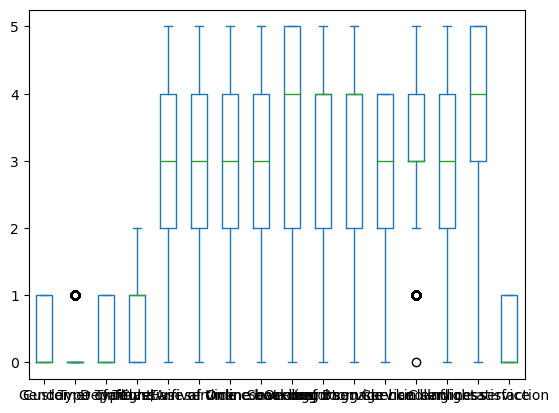

In [7]:
trn.plot(kind='box')

In [8]:
num=trn.select_dtypes(include=np.number)
cat=trn.select_dtypes(exclude=np.number)

In [9]:
ss=StandardScaler()
scaled_trn=pd.DataFrame(ss.fit_transform(num),columns=[i    for i in num ])
trn1=scaled_trn

In [10]:
scaled_trn.skew()

Gender                               0.030350
Customer Type                        1.633129
Type of Travel                       0.821963
Class                                0.547647
Inflight wifi service                0.040180
Departure/Arrival time convenient   -0.334632
Ease of Online booking              -0.019157
Online boarding                     -0.459328
Seat comfort                        -0.486273
On-board service                    -0.420098
Leg room service                    -0.350784
Baggage handling                    -0.676651
Checkin service                     -0.367909
Cleanliness                         -0.301372
Inflight service                    -0.691241
satisfaction                         0.265868
dtype: float64

In [11]:
trn1

,Gender,Customer Type,Type of Travel,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Online boarding,Seat comfort,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Inflight service,satisfaction
0,1.01529,-0.474478,1.492132,0.650017,0.203213,1.271660,0.175385,-0.187266,-0.336261,0.480922,-1.028514,0.312252,-0.243608,-0.218797,1.155170,-0.875865
1,1.01529,2.107581,-0.670182,0.650017,0.203213,-0.694860,-0.538153,-0.927289,-0.336261,-1.073147,-1.788916,-2.230789,-1.034101,-0.218797,-2.246075,-0.875865
2,-0.98494,-0.474478,-0.670182,-0.956228,0.203213,0.616153,0.888923,-0.187266,-0.336261,-0.296112,-0.268112,-0.535428,-1.824594,-0.218797,0.304859,-0.875865
3,-0.98494,-0.474478,-0.670182,-0.956228,-1.300794,0.616153,0.888923,0.552757,-0.336261,-1.850181,-1.788916,-2.230789,-0.243608,-1.743171,-2.246075,-0.875865
4,-0.98494,-0.474478,-0.670182,0.650017,0.955217,-0.039353,-0.538153,0.552757,0.422963,0.480922,1.252692,-0.535428,-1.824594,0.543390,0.304859,-0.875865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97405,1.01529,2.107581,-0.670182,0.650017,-1.300794,1.271660,-1.251691,-1.667312,-0.336261,1.257957,-1.788916,-0.535428,0.546886,0.543390,-0.545453,-0.875865
97406,-0.98494,-0.474478,1.492132,2.256263,0.203213,-1.350366,0.175385,-0.187266,-1.854710,-0.296112,-1.788916,-1.383108,-1.824594,-1.743171,-1.395764,-0.875865
97407,1.01529,-0.474478,-0.670182,-0.956228,-1.300794,-1.350366,-1.251691,0.552757,0.422963,1.257957,1.252692,1.159932,-0.243608,-0.218797,1.155170,1.141729
97408,-0.98494,2.107581,-0.670182,-0.956228,0.203213,-0.039353,0.175385,-0.187266,-0.336261,1.257957,1.252692,1.159932,0.546886,-0.218797,0.304859,-0.875865


In [12]:
x=trn.drop('satisfaction',axis=1)
y=trn['satisfaction']


In [13]:
ytrain=trn['satisfaction']

In [14]:
xtest=tst.drop('satisfaction',axis=1)
ytest=tst['satisfaction']

In [15]:
ss=StandardScaler()
scaled_trn=pd.DataFrame(ss.fit_transform(x),columns=[i    for i in x.columns ])
xtrain_scaled=scaled_trn

In [16]:
xtrain_scaled

,Gender,Customer Type,Type of Travel,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Online boarding,Seat comfort,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Inflight service
0,1.01529,-0.474478,1.492132,0.650017,0.203213,1.271660,0.175385,-0.187266,-0.336261,0.480922,-1.028514,0.312252,-0.243608,-0.218797,1.155170
1,1.01529,2.107581,-0.670182,0.650017,0.203213,-0.694860,-0.538153,-0.927289,-0.336261,-1.073147,-1.788916,-2.230789,-1.034101,-0.218797,-2.246075
2,-0.98494,-0.474478,-0.670182,-0.956228,0.203213,0.616153,0.888923,-0.187266,-0.336261,-0.296112,-0.268112,-0.535428,-1.824594,-0.218797,0.304859
3,-0.98494,-0.474478,-0.670182,-0.956228,-1.300794,0.616153,0.888923,0.552757,-0.336261,-1.850181,-1.788916,-2.230789,-0.243608,-1.743171,-2.246075
4,-0.98494,-0.474478,-0.670182,0.650017,0.955217,-0.039353,-0.538153,0.552757,0.422963,0.480922,1.252692,-0.535428,-1.824594,0.543390,0.304859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97405,1.01529,2.107581,-0.670182,0.650017,-1.300794,1.271660,-1.251691,-1.667312,-0.336261,1.257957,-1.788916,-0.535428,0.546886,0.543390,-0.545453
97406,-0.98494,-0.474478,1.492132,2.256263,0.203213,-1.350366,0.175385,-0.187266,-1.854710,-0.296112,-1.788916,-1.383108,-1.824594,-1.743171,-1.395764
97407,1.01529,-0.474478,-0.670182,-0.956228,-1.300794,-1.350366,-1.251691,0.552757,0.422963,1.257957,1.252692,1.159932,-0.243608,-0.218797,1.155170
97408,-0.98494,2.107581,-0.670182,-0.956228,0.203213,-0.039353,0.175385,-0.187266,-0.336261,1.257957,1.252692,1.159932,0.546886,-0.218797,0.304859


In [17]:
ss=StandardScaler()
scaled_tst=pd.DataFrame(ss.fit_transform(xtest),columns=[i    for i in xtest.columns ])
xtest_scaled=scaled_tst

In [18]:
xtest_scaled

,Gender,Customer Type,Type of Travel,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Online boarding,Seat comfort,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Inflight service
0,-0.986540,-0.470251,-0.666919,-0.954252,0.206726,-0.032865,-1.258384,0.554983,1.179193,0.474669,0.495774,0.310295,1.338568,1.301248,0.301774
1,1.013644,2.126525,-0.666919,0.664501,-0.546291,-0.686331,-0.545375,0.554983,0.424876,-1.855379,-0.261982,-0.536439,0.550918,0.542897,-0.546738
2,1.013644,2.126525,-0.666919,0.664501,-0.546291,0.620602,-0.545375,-0.927680,-0.329442,1.251351,-1.777495,-0.536439,-1.024381,-0.215454,1.150286
3,1.013644,-0.470251,-0.666919,-0.954252,0.206726,-0.032865,0.167635,-0.927680,-0.329442,-0.302014,-0.261982,-0.536439,-0.236732,-1.732156,-0.546738
4,1.013644,-0.470251,1.499433,0.664501,-1.299308,1.274068,-1.258384,-1.669012,-1.838076,-1.078697,1.253530,-1.383174,-0.236732,-1.732156,0.301774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32465,-0.986540,-0.470251,1.499433,0.664501,0.959743,0.620602,0.880645,-0.186349,0.424876,-1.855379,0.495774,-2.229908,1.338568,0.542897,-2.243762
32466,1.013644,2.126525,-0.666919,-0.954252,-0.546291,-0.032865,0.167635,-0.927680,1.179193,0.474669,-1.777495,0.310295,0.550918,1.301248,0.301774
32467,1.013644,-0.470251,1.499433,-0.954252,-0.546291,0.620602,-0.545375,-0.927680,-0.329442,1.251351,1.253530,0.310295,0.550918,-0.215454,0.301774
32468,-0.986540,-0.470251,1.499433,0.664501,1.712760,1.274068,1.593655,1.296314,1.179193,-1.855379,-1.777495,1.157030,-1.024381,1.301248,-1.395250


In [19]:
def per_measures(model,test,pred):
    accuracy=accuracy_score(test,pred)
    f1score=f1_score(test,pred)
    recall=recall_score(test,pred)
    precision=precision_score(test,pred)
    return(accuracy,recall,precision,f1score)

In [20]:
import pandas as pd

# Initialize an empty DataFrame
perf_score = pd.DataFrame(columns=['Model', 'Accuracy', 'Recall', 'Precision', 'F1 Score'])

def update_performance(name, model, test, pred):
    # Assign 'perf_score' as a global variable
    global perf_score

    # Ensure 'perf_score' is a DataFrame
    if not isinstance(perf_score, pd.DataFrame):
        perf_score = pd.DataFrame(columns=['Model', 'Accuracy', 'Recall', 'Precision', 'F1 Score'])

    # Append the results to the dataframe 'perf_score'
    # 'ignore_index=True' does not consider the index labels
    perf_score = perf_score.append({
        'Model': name,
        'Accuracy': per_measures(model, test, pred)[0],
        'Recall': per_measures(model, test, pred)[1],
        'Precision': per_measures(model, test, pred)[2],
        'F1 Score': per_measures(model, test, pred)[3]
    },
    ignore_index=True)

In [21]:
perf_score_training=pd.DataFrame(columns=['Model','Accuracy','Recall','Precision','F1 Score'])
def update_performances_train(name, model,train,pred):
    # assign 'comp_perf' as global variable
    global perf_score_training

    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    perf_score_training = perf_score_training.append({'Model'       : name,
                                    'Accuracy'    : per_measures(model,train,pred)[0],
                                    'Recall'      : per_measures(model,train,pred)[1],
                                    'Precision'   : per_measures(model,train,pred)[2],
                                    'F1 Score'    : per_measures(model,train,pred)[3]
                                    # 'AIC'         : per_measures(model,ytest,ypred)[4],
                                    # 'Reliability' : per_measures(model,ytest,ypred)[5]

                                     },
                                   ignore_index=True)

## Logistic Regression

In [22]:
lr=LogisticRegression()
lr.fit(xtrain_scaled,ytrain)
ypred_lr=lr.predict(xtest_scaled)
print(confusion_matrix(ytest,ypred_lr))
print(classification_report(ytest,ypred_lr))

[[16575  1754]
 [ 2347 11794]]
              precision    recall  f1-score   support

         0.0       0.88      0.90      0.89     18329
         1.0       0.87      0.83      0.85     14141

    accuracy                           0.87     32470
   macro avg       0.87      0.87      0.87     32470
weighted avg       0.87      0.87      0.87     32470



In [23]:
predicted_xtrain_lr=lr.predict(xtrain_scaled)
print('\nTraining data')
matrix=confusion_matrix(ytrain,predicted_xtrain_lr)
print(matrix)
measure_train=classification_report(ytrain,predicted_xtrain_lr)
print('f1_score: ',metrics.f1_score(ytrain,predicted_xtrain_lr))
print(measure_train)


Training data
[[49739  5384]
 [ 6963 35324]]
f1_score:  0.8512320019278269
              precision    recall  f1-score   support

         0.0       0.88      0.90      0.89     55123
         1.0       0.87      0.84      0.85     42287

    accuracy                           0.87     97410
   macro avg       0.87      0.87      0.87     97410
weighted avg       0.87      0.87      0.87     97410



# Tuned base model

In [34]:

logistic_regression = LogisticRegression()
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],               # Regularization type
    'solver': ['liblinear', 'lbfgs', 'saga']  # Solver type
}

# Create the GridSearchCV object
grid_search_log = GridSearchCV(logistic_regression, param_grid, cv=5,  scoring='f1_macro')

# Fit the model to the training data
grid_search_log.fit(xtrain_scaled,ytrain)



GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'lbfgs', 'saga']},
             scoring='f1_macro')

In [35]:
# Get the best parameters and the best estimator
best_params =grid_search_log.best_params_
best_estimator = grid_search_log.best_estimator_
print(best_params,best_estimator)

{'C': 0.01, 'penalty': 'l1', 'solver': 'saga'} LogisticRegression(C=0.01, penalty='l1', solver='saga')


In [37]:
ypred_tuned=grid_search_log.predict(xtest_scaled)
print(classification_report(ytest,ypred_tuned))

              precision    recall  f1-score   support

         0.0       0.88      0.91      0.89     18329
         1.0       0.87      0.83      0.85     14141

    accuracy                           0.87     32470
   macro avg       0.87      0.87      0.87     32470
weighted avg       0.87      0.87      0.87     32470



In [38]:
predicted_xtrain_logt=grid_search_log.predict(xtrain_scaled)
print('\nTraining data')
matrix=confusion_matrix(ytrain,predicted_xtrain_logt)
print(matrix)
measure_train=classification_report(ytrain,predicted_xtrain_logt)
print('f1_score: ',metrics.f1_score(ytrain,predicted_xtrain_logt))
print(measure_train)


Training data
[[49756  5367]
 [ 6957 35330]]
f1_score:  0.8514894437481924
              precision    recall  f1-score   support

         0.0       0.88      0.90      0.89     55123
         1.0       0.87      0.84      0.85     42287

    accuracy                           0.87     97410
   macro avg       0.87      0.87      0.87     97410
weighted avg       0.87      0.87      0.87     97410



## K nearest neighbour Model 

In [21]:
knn=KNeighborsClassifier()
knn.fit(xtrain_scaled,ytrain)
ypred_knn=knn.predict(xtest_scaled)
print(classification_report(ytest,ypred_knn))

              precision    recall  f1-score   support

         0.0       0.92      0.97      0.94     18329
         1.0       0.95      0.89      0.92     14141

    accuracy                           0.93     32470
   macro avg       0.94      0.93      0.93     32470
weighted avg       0.93      0.93      0.93     32470



In [22]:
predicted_xtrain_knn=knn.predict(xtrain_scaled)
print('\nTraining data')
matrix=confusion_matrix(ytrain,predicted_xtrain_knn)
print(matrix)
measure_train=classification_report(ytrain,predicted_xtrain_knn)
print(measure_train)


Training data
[[53991  1132]
 [ 3306 38981]]
              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96     55123
         1.0       0.97      0.92      0.95     42287

    accuracy                           0.95     97410
   macro avg       0.96      0.95      0.95     97410
weighted avg       0.96      0.95      0.95     97410



# Tuned knn 

In [ ]:
knn=KNeighborsClassifier()
# Define the parameter grid to search
param_grid = {
    'n_neighbors': [3, 5, 7,311,313],
    'weights': ['uniform', 'distance', None],  # None added for weights parameter
    'p': [1, 2],  # 1 for Manhattan distance, 2 for Euclidean distance  # None added for leaf_size parameter
}

# Create the GridSearchCV object with 'f1_macro' as the scoring metric
grid_search_knn = GridSearchCV(knn, param_grid, cv=5, scoring='f1_macro')

# Fit the model to the training data
grid_search_knn.fit(xtrain_scaled,ytrain)

# Get the best parameters and the best estimator
best_params = grid_search_knn.best_params_
best_estimator =grid_search_knn.best_estimator_
print(best_params,best_estimator)

In [ ]:
ypred_tuned=grid_search_knn.predict(xtest_scaled)
print(classification_report(ytest,ypred_tuned))

In [ ]:
predicted_xtrain_knnt=grid_search_knn.predict(xtrain_scaled)
print('\nTraining data')
matrix=confusion_matrix(ytrain,predicted_xtrain_knnt)
print(matrix)
measure_train=classification_report(ytrain,predicted_xtrain_knnt)
print('f1_score: ',metrics.f1_score(ytrain,predicted_xtrain_knnt))
print(measure_train)

## Gaussian Naive Bayes Model

In [26]:
gnb=GaussianNB()
gnb_model=gnb.fit(xtrain_scaled,ytrain)
ypred_gnb=gnb_model.predict(xtest_scaled)
print(classification_report(ytest,ypred_gnb))

              precision    recall  f1-score   support

         0.0       0.87      0.92      0.89     18329
         1.0       0.88      0.82      0.85     14141

    accuracy                           0.88     32470
   macro avg       0.88      0.87      0.87     32470
weighted avg       0.88      0.88      0.87     32470



In [27]:
predicted_xtrain_gnb=gnb.predict(xtrain_scaled)
print('\nTraining data')
matrix=confusion_matrix(ytrain,predicted_xtrain_gnb)
print(matrix)
measure_train=classification_report(ytrain,predicted_xtrain_gnb)
print('f1_score: ',metrics.f1_score(ytrain,predicted_xtrain_gnb))
print(measure_train)


Training data
[[50470  4653]
 [ 7417 34870]]
f1_score:  0.8524630240801858
              precision    recall  f1-score   support

         0.0       0.87      0.92      0.89     55123
         1.0       0.88      0.82      0.85     42287

    accuracy                           0.88     97410
   macro avg       0.88      0.87      0.87     97410
weighted avg       0.88      0.88      0.88     97410



## Bernoulli Naive Bayes Model

In [28]:
bnb=BernoulliNB()
bnb_model=bnb.fit(xtrain_scaled,ytrain)
ypred_bnb=bnb_model.predict(xtest_scaled)
print(classification_report(ytest,ypred_bnb))

              precision    recall  f1-score   support

         0.0       0.86      0.90      0.88     18329
         1.0       0.86      0.81      0.83     14141

    accuracy                           0.86     32470
   macro avg       0.86      0.85      0.86     32470
weighted avg       0.86      0.86      0.86     32470



In [29]:
predicted_xtrain_bnb=bnb.predict(xtrain_scaled)
print('\nTraining data')
matrix=confusion_matrix(ytrain,predicted_xtrain_bnb)
print(matrix)
measure_train=classification_report(ytrain,predicted_xtrain_bnb)
print('f1_score: ',metrics.f1_score(ytrain,predicted_xtrain_bnb))
print(measure_train)


Training data
[[49419  5704]
 [ 8116 34171]]
f1_score:  0.8317957206494486
              precision    recall  f1-score   support

         0.0       0.86      0.90      0.88     55123
         1.0       0.86      0.81      0.83     42287

    accuracy                           0.86     97410
   macro avg       0.86      0.85      0.85     97410
weighted avg       0.86      0.86      0.86     97410



## Decision Tree

In [30]:
dt=DecisionTreeClassifier()
dt_model=dt.fit(xtrain_scaled,ytrain)
ypred_dt=dt_model.predict(xtest_scaled)
print(confusion_matrix(ytest,ypred_dt))
print(classification_report(ytest,ypred_dt))

[[17426   903]
 [  906 13235]]
              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95     18329
         1.0       0.94      0.94      0.94     14141

    accuracy                           0.94     32470
   macro avg       0.94      0.94      0.94     32470
weighted avg       0.94      0.94      0.94     32470



In [31]:
predicted_xtrain_dt=dt.predict(xtrain_scaled)
print('\nTraining data')
matrix=confusion_matrix(ytrain,predicted_xtrain_dt)
print(matrix)
measure_train=classification_report(ytrain,predicted_xtrain_dt)
print('f1_score: ',metrics.f1_score(ytrain,predicted_xtrain_dt))
print(measure_train)


Training data
[[55104    19]
 [  291 41996]]
f1_score:  0.9963227444188749
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     55123
         1.0       1.00      0.99      1.00     42287

    accuracy                           1.00     97410
   macro avg       1.00      1.00      1.00     97410
weighted avg       1.00      1.00      1.00     97410



## Tuned Decision Tree 

In [32]:
turned_parameters=[{"criterion":["entropy","gini"],
                   "max_depth":[3,5,6,7,9,10,15]}]

In [33]:
dt2=DecisionTreeClassifier(random_state=10)
tree_grid=GridSearchCV(estimator=dt2,
                      param_grid=turned_parameters,
                      cv=5)

In [34]:
tree_grid_model=tree_grid.fit(xtrain_scaled,ytrain)
tree_grid_model.best_params_

{'criterion': 'entropy', 'max_depth': 15}

In [35]:
ypred_dt2=tree_grid_model.predict(xtest_scaled)

In [36]:
predicted_xtrain_dt2=tree_grid_model.predict(xtrain_scaled)
print('\nTraining data')
matrix=confusion_matrix(ytrain,predicted_xtrain_dt2)
print(matrix)
measure_train=classification_report(ytrain,predicted_xtrain_dt2)
print('f1_score: ',metrics.f1_score(ytrain,predicted_xtrain_dt2))
print(measure_train)


Training data
[[53750  1373]
 [ 2088 40199]]
f1_score:  0.9587283416210545
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97     55123
         1.0       0.97      0.95      0.96     42287

    accuracy                           0.96     97410
   macro avg       0.96      0.96      0.96     97410
weighted avg       0.96      0.96      0.96     97410



## Random Forest Model 

In [37]:
rf=RandomForestClassifier()
rf.fit(xtrain_scaled,ytrain)
ypred_rf=rf.predict(xtest_scaled)
print(classification_report(ytest,ypred_rf))

              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96     18329
         1.0       0.97      0.94      0.95     14141

    accuracy                           0.96     32470
   macro avg       0.96      0.96      0.96     32470
weighted avg       0.96      0.96      0.96     32470



In [38]:
predicted_xtrain_rf=rf.predict(xtrain_scaled)
print('\nTraining data')
matrix=confusion_matrix(ytrain,predicted_xtrain_rf)
print(matrix)
measure_train=classification_report(ytrain,predicted_xtrain_rf)
print('f1_score: ',metrics.f1_score(ytrain,predicted_xtrain_rf))
print(measure_train)


Training data
[[55012   111]
 [  200 42087]]
f1_score:  0.9963188731727525
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     55123
         1.0       1.00      1.00      1.00     42287

    accuracy                           1.00     97410
   macro avg       1.00      1.00      1.00     97410
weighted avg       1.00      1.00      1.00     97410



## Tuned Random Forest

In [39]:
params={'n_estimators': [10,15,20,25,30],
        'max_features': ['sqrt','log2'],
       'max_depth': [5,6,7]}

rf1=RandomForestClassifier(random_state=10)
rf1_cv=GridSearchCV(rf1,param_grid=params,cv=5,scoring='f1_macro')
rf1_cv.fit(xtrain_scaled,ytrain)
rf1_cv.best_params_

{'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 30}

In [40]:
rfnew=RandomForestClassifier(**rf1_cv.best_params_,random_state=10)
rfnew.fit(xtrain_scaled,ytrain)
ypred_rfnew=rfnew.predict(xtest_scaled)
f1_score(ytest,ypred_rfnew)

0.927258478198917

In [41]:
predicted_xtrain_rfnew=rfnew.predict(xtrain_scaled)
print('\nTraining data')
matrix=confusion_matrix(ytrain,predicted_xtrain_rfnew)
print(matrix)
measure_train=classification_report(ytrain,predicted_xtrain_rfnew)
print('f1_score: ',metrics.f1_score(ytrain,predicted_xtrain_rfnew))
print(measure_train)


Training data
[[52318  2805]
 [ 3410 38877]]
f1_score:  0.9259845895509057
              precision    recall  f1-score   support

         0.0       0.94      0.95      0.94     55123
         1.0       0.93      0.92      0.93     42287

    accuracy                           0.94     97410
   macro avg       0.94      0.93      0.93     97410
weighted avg       0.94      0.94      0.94     97410



## Random Forest with Out of Bag

In [42]:
rfoob=RandomForestClassifier(**rf1_cv.best_params_,oob_score=True,random_state=10)
rfoob.fit(xtrain_scaled,ytrain)
ypred_rfoob=rfoob.predict(xtest_scaled)
f1_score(ytest,ypred_rfoob)

0.927258478198917

In [43]:
predicted_xtrain_rfoob=rfoob.predict(xtrain_scaled)
print('\nTraining data')
matrix=confusion_matrix(ytrain,predicted_xtrain_rfoob)
print(matrix)
measure_train=classification_report(ytrain,predicted_xtrain_rfoob)
print('f1_score: ',metrics.f1_score(ytrain,predicted_xtrain_rfoob))
print(measure_train)


Training data
[[52318  2805]
 [ 3410 38877]]
f1_score:  0.9259845895509057
              precision    recall  f1-score   support

         0.0       0.94      0.95      0.94     55123
         1.0       0.93      0.92      0.93     42287

    accuracy                           0.94     97410
   macro avg       0.94      0.93      0.93     97410
weighted avg       0.94      0.94      0.94     97410



## Bagging Knn

In [ ]:
knn=KNeighborsClassifier(n_neighbors=311)
bc_knn=BaggingClassifier(base_estimator=knn,random_state=10)
knn_model=bc_knn.fit(xtrain_scaled,ytrain)
ypred_bc_knn=knn_model.predict(xtest_scaled)

In [ ]:
predicted_xtrain_bc_knn=knn_model.predict(xtrain_scaled)
print('\nTraining data')
matrix=confusion_matrix(ytrain,predicted_xtrain_bc_knn)
print(matrix)
measure_train=classification_report(ytrain,predicted_xtrain_bc_knn)
print('f1_score: ',metrics.f1_score(ytrain,predicted_xtrain_bc_knn))
print(measure_train)

## Ada Boosting 

In [ ]:
ada=AdaBoostClassifier(dt,random_state=10)
ada.fit(xtrain_scaled,ytrain)
ypred_ada=ada.predict(xtest_scaled)
print(classification_report(ytest,ypred_ada))

In [ ]:
predicted_xtrain_ada=ada.predict(xtrain_scaled)
print('\nTraining data')
matrix=confusion_matrix(ytrain,predicted_xtrain_ada)
print(matrix)
measure_train=classification_report(ytrain,predicted_xtrain_ada)
print('f1_score: ',metrics.f1_score(ytrain,predicted_xtrain_ada))
print(measure_train)

## Gradient Boost Classifier 

In [ ]:
gbc=GradientBoostingClassifier()
gbc.fit(xtrain_scaled,ytrain)
ypred_gbc=rf.predict(xtest_scaled)
print(classification_report(ytest,ypred_gbc))

In [ ]:
predicted_xtrain_gbc=gbc.predict(xtrain_scaled)
print('\nTraining data')
matrix=confusion_matrix(ytrain,predicted_xtrain_gbc)
print(matrix)
measure_train=classification_report(ytrain,predicted_xtrain_gbc)
print('f1_score: ',metrics.f1_score(ytrain,predicted_xtrain_gbc))
print(measure_train)

## XG Boost Classifier 

In [ ]:
xg=XGBClassifier()
xg.fit(xtrain_scaled,ytrain)
ypred_xg=xg.predict(xtest_scaled)
print(classification_report(ytest,ypred_xg))

In [ ]:
predicted_xtrain_xg=xg.predict(xtrain_scaled)
print('\nTraining data')
matrix=confusion_matrix(ytrain,predicted_xtrain_xg)
print(matrix)
measure_train=classification_report(ytrain,predicted_xtrain_xg)
print('f1_score: ',metrics.f1_score(ytrain,predicted_xtrain_xg))
print(measure_train)

## Stacking 

In [ ]:
lr=LogisticRegression()
knn=KNeighborsClassifier()
dt=DecisionTreeClassifier()
base_learner=[('lr_model', lr ),('knn_model', knn),('dt_model', dt)]
stack=StackingClassifier(estimators=base_learner, final_estimator=GaussianNB())
stack.fit(xtrain_scaled,ytrain)
ypred_stack=stack.predict(xtest_scaled)

In [ ]:
predicted_xtrain_stack=stack.predict(xtrain_scaled)
print('\nTraining data')
matrix=confusion_matrix(ytrain,predicted_xtrain_stack)
print(matrix)
measure_train=classification_report(ytrain,predicted_xtrain_stack)
print('f1_score: ',metrics.f1_score(ytrain,predicted_xtrain_stack))
print(measure_train)

In [ ]:
# here random forest and gradien boost is giving better model 

## Variable Importance plot of decision Tree

In [ ]:
plot_vimp(0, x, y, feature_names)

## Variable Importance plot of Random Forest

In [ ]:
plot_vimp(1,x,y,feature_names)

## Variable Importance plot of GradientBoost

In [ ]:
plot_vimp(2,x,y,feature_names)

## Variable Importance plot of AdaBoost

In [ ]:
plot_vimp(3,x,y,feature_names)

## Variable Importance plot of XGBoost

In [ ]:
plot_vimp(4,x,y,feature_names)

## Confusion Matrix and ROC curve of Logistic Regression

In [ ]:
con_lr=confusion_matrix(ytest,ypred_lr)
conf_matrix = pd.DataFrame(data = con_lr,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 10)
# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 10)
# display the plot
plt.show()
draw_roc(ytest,ypred_lr)

## Confusion Matrix and ROC curve of KNeighbour 

In [ ]:
con_knn=confusion_matrix(ytest,ypred_knn)
conf_matrix = pd.DataFrame(data = con_knn,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 10)
# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 10)
# display the plot
plt.show()
draw_roc(ytest,ypred_knn)

## Confusion Matrix and ROC curve of Gaussian Naive Bayes

In [ ]:
con_knn=confusion_matrix(ytest,ypred_gnb)
conf_matrix = pd.DataFrame(data = con_knn,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 10)
# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 10)
# display the plot
plt.show()
draw_roc(ytest,ypred_gnb)

## Confusion Matrix and ROC curve of Decision Tree

In [ ]:
con_knn=confusion_matrix(ytest,ypred_dt)
conf_matrix = pd.DataFrame(data = con_knn,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 10)
# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 10)
# display the plot
plt.show()
draw_roc(ytest,ypred_dt)

## Confusion Matrix and ROC curve of Random Forest

In [ ]:
con_knn=confusion_matrix(ytest,ypred_rf)
conf_matrix = pd.DataFrame(data = con_knn,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 10)
# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 10)
# display the plot
plt.show()
draw_roc(ytest,ypred_rf)

## Confusion Matrix and ROC curve of Gradient Boost

In [ ]:
con_knn=confusion_matrix(ytest,ypred_gbc)
conf_matrix = pd.DataFrame(data = con_knn,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 10)
# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 10)
# display the plot
plt.show()
draw_roc(ytest,ypred_gbc)

## Confusion Matrix and ROC curve of AdaBoost

In [ ]:
con_knn=confusion_matrix(ytest,ypred_ada)
conf_matrix = pd.DataFrame(data = con_knn,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 10)
# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 10)
# display the plot
plt.show()
draw_roc(ytest,ypred_ada)

## Confusion Matrix and ROC curve of XGBoost

In [ ]:
con_knn=confusion_matrix(ytest,ypred_xg)
conf_matrix = pd.DataFrame(data = con_knn,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 10)
# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 10)
# display the plot
plt.show()
draw_roc(ytest,ypred_xg)